C:\Users\indum\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                        Model  Accuracy   ROC-AUC
0  Base (Decision Tree Stump)  0.894737  0.897150
1                    AdaBoost  0.973684  0.997052


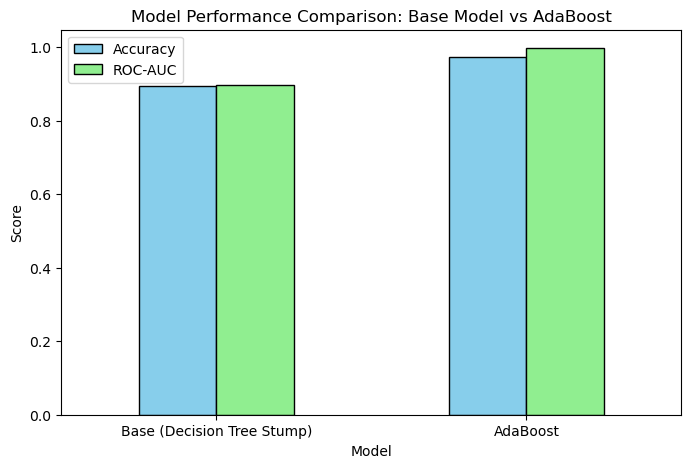

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

base_model = DecisionTreeClassifier(max_depth=1, random_state=42)
base_model.fit(X_train, y_train)

adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

y_pred_base = base_model.predict(X_test)
y_pred_adaboost = adaboost_model.predict(X_test)

accuracy_base = accuracy_score(y_test, y_pred_base)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)

roc_auc_base = roc_auc_score(y_test, base_model.predict_proba(X_test)[:, 1])
roc_auc_adaboost = roc_auc_score(y_test, adaboost_model.predict_proba(X_test)[:, 1])

comparison_data = {
    'Model': ['Base (Decision Tree Stump)', 'AdaBoost'],
    'Accuracy': [accuracy_base, accuracy_adaboost],
    'ROC-AUC': [roc_auc_base, roc_auc_adaboost]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

comparison_df.set_index('Model').plot(kind='bar', figsize=(8, 5), color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Model Performance Comparison: Base Model vs AdaBoost')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()
